# NSD Final Project

## Title: Reinforcement Learning in Options Hedging 

### Team member: Jiang, T., Cui, D.F. and Wang, Y.Z.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

### Abstract

### Table of content
- Introduction
    * Delta Hedging
    * Reinforcement Learning
- Toolkits
    * Gym
    * Spinning Up
    * Installation
- Our Setting
    * Learning Algorithms 
    * Models
    * Formulation of The Problem
    * The Implementation of Environments
- Experiment
    * Detailed Setting
        - Parameters of Models
        - Parameters of Environments
    * The Results of Our Method
    * The Results of Delta Hedging
    * Comparison
- Conclusion and Discussions
    

### Introduction

### Toolkits
#### Gym
The following content is from gym website: http://gym.openai.com
- ' Gym is a toolkit for developing and comparing reinforcement learning algorithms. It makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Theano.'
-----------
we use gym to implement our own environment, the environment code is also below, yet we need to do the following installation to follow the gym style but not simply define the function in the jupyter notebook

#### Spinning up
The following content is from Spinning up website: https://spinningup.openai.com
- '...So our package here is designed to serve as the missing middle step for people who are excited by deep RL, and would like to learn how to use it or make a contribution, but don’t have a clear sense of what to study or how to transmute algorithms into code. We’ve tried to make this as helpful a launching point as possible.'
----------------------
we use spinningup to implement our algorithms, but we change their code, so we enclose this packages in the work dir.

#### Installation
The installation of spinup may take some time because it have many related packages, if you don't want to train the model yourself but just run our testing code, you at least need to have pytorch.

gym, must install to run the code

In [10]:
!pip3 install gym

Processing /Users/emperial/Library/Caches/pip/wheels/18/e1/58/89a2aa24e6c2cc800204fc02010612afdf200926c4d6bfe315/gym-0.17.2-py3-none-any.whl
ERROR: spinup 0.2.0 has requirement gym[atari,box2d,classic_control]~=0.15.3, but you'll have gym 0.17.2 which is incompatible.


if you don't want to install spinup

In [11]:
!pip3 install torch

for spinup

In [12]:
!pip3 install -e spinningup-master

Obtaining file:///Users/emperial/Desktop/%E7%A7%91%E7%A0%94/%E6%9A%91%E6%9C%9F%E5%AD%A6%E6%A0%A1/RL_Hedging/%E5%A4%A7%E4%BD%9C%E4%B8%9A/spinningup-master
Processing /Users/emperial/Library/Caches/pip/wheels/be/72/05/d3dfcfc2a31bbf886112b6373881bdf2e9e00d2c943f3b4f91/gym-0.15.7-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.17.2
    Uninstalling gym-0.17.2:
      Successfully uninstalled gym-0.17.2
  Attempting uninstall: spinup
    Found existing installation: spinup 0.2.0
    Uninstalling spinup-0.2.0:
      Successfully uninstalled spinup-0.2.0
  Running setup.py develop for spinup


In [13]:
!pip3 install -e DHENV

Obtaining file:///Users/emperial/Desktop/%E7%A7%91%E7%A0%94/%E6%9A%91%E6%9C%9F%E5%AD%A6%E6%A0%A1/RL_Hedging/%E5%A4%A7%E4%BD%9C%E4%B8%9A/DHENV
  Attempting uninstall: DHENV
    Found existing installation: DHENV 0.0.1
    Uninstalling DHENV-0.0.1:
      Successfully uninstalled DHENV-0.0.1
  Running setup.py develop for DHENV


In [15]:
import gym#test gym

In [16]:
import torch#test torch

In [17]:
env = gym.make('DHENV:DHENV-v0')#test DHENV

In [18]:
import spinup#test spinup

### Our Setting
#### Models
Because ddpg is chosen as our algorithm, we need to model two functions. 
- The first function is the Q function, which is to map the action and state into the revenue
- and the second is the P function, which is to map the state to the action. 
* Specifically, we all choose multiple perceptrons, the simplest deep learning network, as our modeling function. On the number of layers, we choose 4 (stock number, account deposit, stock price, maturity time) / 5 (plus actions) - > 80-- > 40 -- > 1, and add leakyrelu activation layer in the middle.Because ddpg is chosen as our algorithm, we need to model two functions. The first function is the Q function, which is to map the action and state into the revenue, and the second is the P function, which is to map the state to the action. Specifically, we all choose multiple perceptrons, the simplest deep learning network, as our modeling function. On the number of layers, we choose 4 (stock number, account deposit, stock price, maturity time) / 5 (plus actions) - > 80-- > 40 -- > 1, and add leakyrelu activation layer in the middle.**In particular, we add a tanh function at the end of P function. We will talk about its importance below. **The code is as follows

In [20]:
import torch
import torch.nn as nn
import numpy as np
class HEDGING_Actor(nn.Module):

    def __init__(self, obs_dim, act_dim, act_limit):
        super().__init__()
        self.fc1 = nn.Linear(obs_dim, 80)
        self.ac1 = nn.LeakyReLU(0.1)
        self.fc2 = nn.Linear(256, 128)
        self.ac2 = nn.LeakyReLU(0.1)
        self.fc3 = nn.Linear(80, 40)
        self.ac3 = nn.LeakyReLU(0.1)
        self.fc4 = nn.Linear(40, act_dim)
        self.th = nn.Tanh()

    def forward(self, obs):
        # Return output from network scaled to action space limits.
        c = obs.numpy()
        if np.isnan(c).any():
            print('nan')
            exit()
        for item in c:
            try:
                for it in item:
                    if np.inf == abs(it):
                        print('inf')
                        print(c)
                        exit()
            except:
                 if np.inf == abs(item):
                     print('inf')
                     print(c)
                     exit()
        x = self.fc1(obs)
        x = self.ac1(x)
        '''
        x = self.fc2(x)
        x = self.ac2(x)
        '''
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        d = x.detach().numpy()
        if np.isnan(d).any():
            print('nan')
            exit()
        #x = torch.clamp(x, min = -5, max = 10)
        return self.th(x)

class HEDGING_QFunction(nn.Module):

    def __init__(self, obs_dim, act_dim):
        super().__init__()
        self.fc1 = nn.Linear(obs_dim + act_dim, 80)
        self.ac1 = nn.LeakyReLU(0.1)
        self.fc2 = nn.Linear(256, 128)
        self.ac2 = nn.LeakyReLU(0.1)
        self.fc3 = nn.Linear(80, 40)
        self.ac3 = nn.LeakyReLU(0.1)
        self.fc4 = nn.Linear(40, act_dim)

    def forward(self, obs, act):
        x = self.fc1(torch.cat([obs, act], dim=-1))
        x = self.ac1(x)
        '''
        x = self.fc2(x)
        x = self.ac2(x)
        '''
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        return torch.squeeze(x, -1) # Critical to ensure q has right shape.

class HEDGING(nn.Module):

    def __init__(self, observation_space, action_space,activation=nn.ReLU):
        super().__init__()

        obs_dim = observation_space.shape[0]
        act_dim = action_space.shape[0]
        act_limit = action_space.high[0]

        # build policy and value functions
        self.pi = HEDGING_Actor(obs_dim, act_dim, act_limit)
        self.q = HEDGING_QFunction(obs_dim, act_dim)

    def act(self, obs):
        with torch.no_grad():
            return self.pi(obs).numpy()

The reasons why the model is like that is below:
- The number of layers of the model and the number of neurons: These are the results of experiment evaluated by convergence and rewards. In the code, you can see some traces of experiments that have not been deleted. Of course, due to the limitation of time, we did not make a more detailed parameter adjustment. 
- The tanh function: This function aim to solve the problem of the infinity action and reward. The function of tanh is - 1 to 1, which makes the range of action very stable. If the tanh function is not added, it is easy to have infinity, which will cause nan to appear in the training parameters.
- Why tanh but not other: Your next question may be why you don't use other methods to solve the above problem. For example, if the action is forced to be limited to a certain range, this method will prevent the function from gradient descent. Intuitively, you can understand this thing: suppose the output value is 10000, However, we limit the action to - 5 to 5. At this time, the gradient around 10000 is 0, because whether we change 10000 into 9000 or 11000, the final benefit is the benefit with action of 5, so this method is not acceptable. Compared with the activation function of sigmoid, the range of sigmoid is 0 to 1, and tanh is from - 1 to + 1, which is more suitable for the problem of positive and negative.

### Experiment
#### Training
Training take about 7 hours, so if you do not have time do not run the cell below or you can just run to test if it run well. , and can load the network straightly from the dir.

In [21]:
from spinup import ddpg_pytorch as ddpg#run it freely

In [22]:
actat, ac = ddpg(env_fn=lambda : gym.make('DHENV:DHENV-v1'),pi_lr = 1e-4, q_lr = 1e-4, actor_critic = HEDGING, num_test_episodes=100)#run it to train

Logging data to /tmp/experiments/1596896040/progress.txt
Saving config:

{
    "ac_kwargs":	{},
    "act_noise":	0.1,
    "actor_critic":	"HEDGING",
    "batch_size":	100,
    "env_fn":	"<function <lambda> at 0x15a4527a0>",
    "epochs":	1,
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x15a3d7a10>":	{
            "epoch_dict":	{},
            "exp_name":	null,
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"/tmp/experiments/1596896040",
            "output_file":	{
                "<_io.TextIOWrapper name='/tmp/experiments/1596896040/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{},
    "max_ep_len":	1000,
    "num_test_episodes":	100,
    "pi_lr":	0.0001,
    "polyak":	0.995,
    "q_lr":	0.0001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "start_ste

In [23]:
actat = torch.load('actar.pkl')
ac = torch.load('ac.pkl')#run it to load

You may ask why there are two networks here. This is because in the ddpg algorithm, there is a training network and a final network. Because the final network is only partially updated with the parameters of the training network, it receives the initial difference model with little influence, but there is less training. Let's take a look at their performance separately.

#### Evaluation
Next, we use Monte Carlo simulation to conduct 10000 rounds of simulation tests on the two networks and delta hedging strategy respectively. Through these data, we evaluate their behavior from the two dimensions of discounted profit & loss and the final accounts value. Finally, we show their different behavior logic and try to explain the different values，**Monte Carlo simulation takes about an hour. If you don't have enough time, you can also use the data we have stored directly.**

In [24]:
import gym
import copy
import pickle
testlist = ['ac','actar','delta']

In [23]:
#run simulation
Accounts = {}
Rewards = {}
actions = {}
Prices = {}
testlist = ['ac','actar','delta']
for item in testlist:
    Accounts[item] = []
    actions[item] = []
    Rewards[item] = []
    Prices[item] = []
for item in testlist:
    if item == 'ac':
        actitem = ac
        env = gym.make('DHENV:DHENV-v1')
    elif item == 'actar':
        actitem = actat
        env = gym.make('DHENV:DHENV-v1')
    else:
        actitem = ac
        env = gym.make('DHENV:DHENV-v3')
    for j in range(10000):
        print(j)
        state = env.reset()
        act = actitem.act(torch.from_numpy(state))
        for i in range(200):
            s, r, d, _ = env.step(act)
            if d:
                break
            act = actitem.act(torch.from_numpy(s))
        Accounts[item].append(copy.deepcopy(env.Accounts))
        actions[item].append(copy.deepcopy(env.actions))
        Rewards[item].append(copy.deepcopy(env.rewards))
        Prices[item].append(copy.deepcopy(env.prices))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


KeyboardInterrupt: 

In [24]:
#load data
with open('Accounts.pkl','rb') as f:
    Accounts = pickle.load(f)
with open('Prices.pkl','rb') as f:
    Prices = pickle.load(f)
with open('Rewards.pkl','rb') as f:
    Rewards = pickle.load(f)
with open('actions.pkl','rb') as f:
    actions = pickle.load(f)

First, we plot the mean of prices +- 1*std and the mean of Account value +- 1*std below:
- same mean and std of prices means that the simulation is right
- for the accounts value, we can see the acnet get the lowest var yet also the lowest mean at last, while the actarget get the larget mean and largest std at last, the delta mean is just in the middle

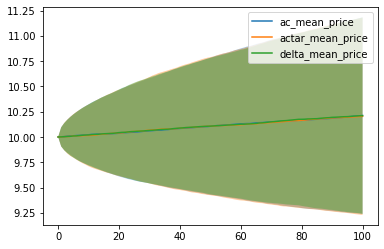

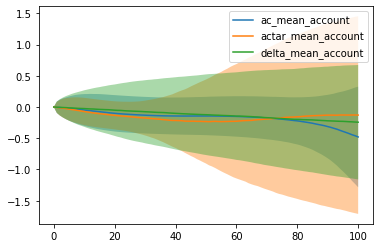

In [25]:
def plotprices(pricedict, testlist):
    for item in testlist:
        meanps = []
        stdps = []
        pricelist = pricedict[item]
        for price in zip(*pricelist):
            mp = np.mean(price)
            std = np.std(price)
            meanps.append(mp)
            stdps.append(std)
        plt.plot(meanps, label = item + '_mean_price')
        plt.fill_between(x = range(len(meanps)), y1 = [x-y for x, y in zip(meanps, stdps)], y2 = [x + y for x, y in zip(meanps, stdps)],alpha = 0.4)
    plt.legend()
    plt.show()
def plotaccounts(accountdict, testlist):
    for item in testlist:
        meanps = []
        stdps = []
        accountlist = accountdict[item]
        for account in zip(*accountlist):
            mp = np.mean(account)
            std = np.std(account)
            meanps.append(mp)
            stdps.append(std)
        plt.plot(meanps, label = item + '_mean_account')
        plt.fill_between(x = range(len(meanps)), y1 = [x-y for x, y in zip(meanps, stdps)], y2 = [x + y for x, y in zip(meanps, stdps)],alpha = 0.4)
    plt.legend()
    plt.show()
import matplotlib.pyplot as plt
plotprices(Prices, testlist)
plotaccounts(Accounts, testlist)

Next, we see the final evaluation of our method---the mean and std of the cumrewards and Accounts value of these two methods, we first draw the histogram and give the statistics, the discount factor is 0.99

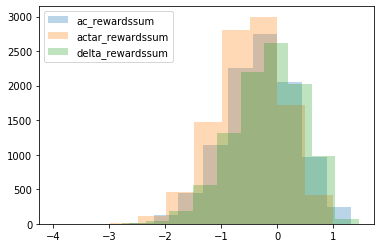

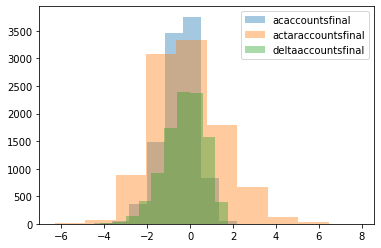

In [26]:
def histrewards(rewardsdict, testlist, disfac):
    for item in testlist:
        cumrewards = []
        rewardlist = rewardsdict[item]
        for reward_single in rewardlist:
            rewardsum = 0
            cumprodfac = 1
            for reward in reward_single:
                rewardsum += reward * cumprodfac
                cumprodfac *= disfac
            cumrewards.append(rewardsum)
        plt.hist(cumrewards, label = item + '_rewardssum', alpha = 0.3)
    plt.legend()
    plt.show()
def histaccounts(accountdict, testlist):
    for item in testlist:
        accountlist = accountdict[item]
        accarray = np.array(accountlist)
        plt.hist(accarray[:,-1], label = item + 'accountsfinal', alpha = 0.4)
    plt.legend()
    plt.show()
histrewards(Rewards, testlist, 0.99)
histaccounts(Accounts, testlist)

In [27]:
import pandas as pd
def statistics_rewards(rewardsdict, testlist, disfac):
    df = pd.DataFrame(index = ['mean', 'std'])
    for item in testlist:
        cumrewards = []
        rewardlist = rewardsdict[item]
        for reward_single in rewardlist:
            rewardsum = 0
            cumprodfac = 1
            for reward in reward_single:
                rewardsum += reward * cumprodfac
                cumprodfac *= disfac
            cumrewards.append(rewardsum)
        df[item] = [np.mean(cumrewards), np.std(cumrewards)]
    return df
def statistics_accounts(accountdict, testlist):
    df = pd.DataFrame(index = ['mean', 'std'])
    for item in testlist:
        accountlist = accountdict[item]
        accarray = np.array(accountlist)
        df[item] = [ np.mean(accarray[:,-1]), np.std(accarray[:,-1]) ]
    return df

In [28]:
statistics_rewards(Rewards, testlist, 0.99)

,ac,actar,delta
mean,-0.301628,-0.500303,-0.161711
std,0.629065,0.606036,0.619009


In [29]:
statistics_accounts(Accounts, testlist)

,ac,actar,delta
mean,-0.479528,-0.129074,-0.243149
std,0.805931,1.583017,0.916297


we see that if use cum rewards as the evaluation method, the delta hedging remain the best, but if we use the account's final value as evaluation method, the actarget have the highest mean, yet with higher std, we can plot their actions mean and std to see their change

In [30]:
def plotactions(accountdict, testlist):
    for item in testlist:
        meanps = []
        stdps = []
        accountlist = accountdict[item]
        for account in zip(*accountlist):
            mp = np.mean(account)
            std = np.std(account)
            meanps.append(mp)
            stdps.append(std)
        plt.plot(meanps, label = item + '_actions')
        plt.fill_between(x = range(len(meanps)), y1 = [x-y for x, y in zip(meanps, stdps)], y2 = [x + y for x, y in zip(meanps, stdps)],alpha = 0.4)
    plt.legend()
    plt.show()

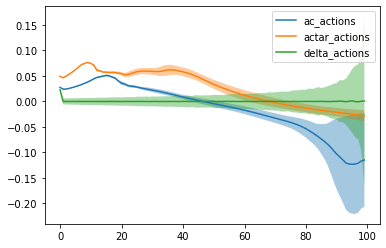

In [31]:
plotactions(actions, testlist)

we can see that compare to the delta hedging method, the rl method have larger change of holding position, but the variance of action is not necessarily greater, the actar actually only change a few

### Conclusion and Discussions

### Reference